# Proyecto final #3: Resultados de clasificación

**Autores:**
*   Jorge Sebastián Arroyo Estrada CC. 1193482707
*   Daniel Felipe Yépez Taimal CC. 1004193180

**Procesamiento Digital de Imágenes**

**Facultad de Ingeniería**

**Universidad de Antioquia**

---

# Librerías

In [3]:
import json
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np

## Rutas

In [4]:
# Folder paths
METHODS = ["OVR", "Softmax"]
DB_BASE_PATH = [Path(f"./{method.lower()}_results/") for method in METHODS]

# Results filenames
file_names = [
    "DB 64×64",
    "DB 128×128",
    "DB 64×64 PCA",
    "DB 128×128 PCA",
]

# Graficar los resultados

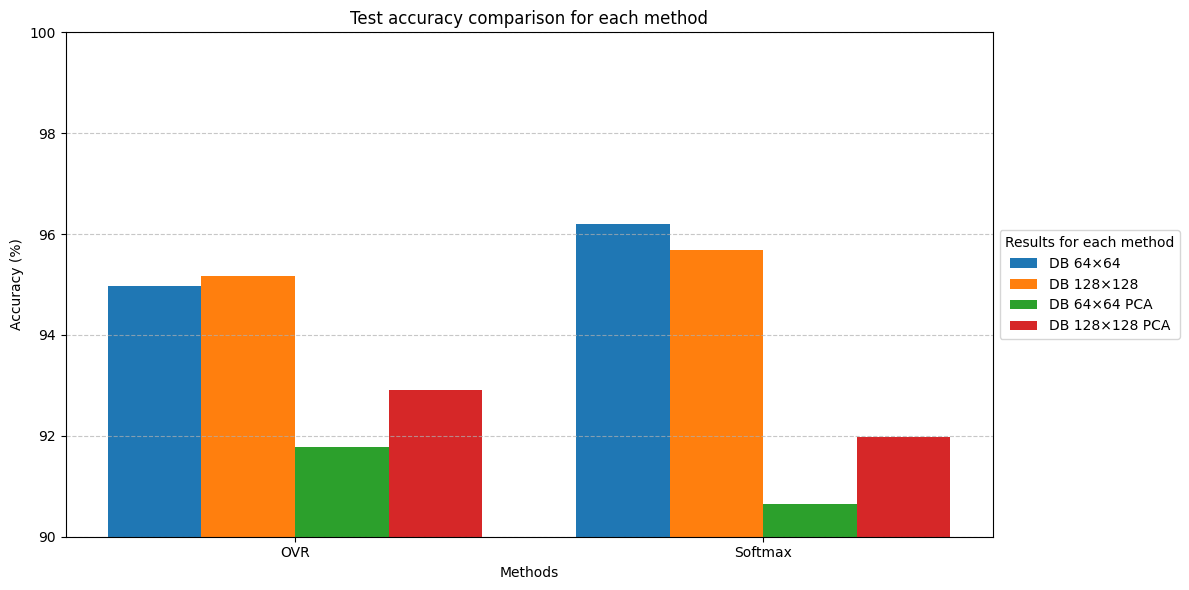

In [5]:
all_accuracies = {}
for folder in DB_BASE_PATH:
    all_accuracies[folder] = []
    for file_name in file_names:
        file_path = folder / f"{file_name}_test_results.json"
        try:
            with open(file_path, "r") as f:
                data = json.load(f)
                all_accuracies[folder].append(
                    data["accuracy"] * 100
                )
        except FileNotFoundError:
            print(f"Archivo no encontrado: {file_path}")
            all_accuracies[folder].append(
                None
            )
        except KeyError:
            print(f"El archivo {file_path} no contiene la clave 'accuracy'.")
            all_accuracies[folder].append(None)

# Extract file labels (file names without extensions) using Path
file_labels = [Path(name).stem for name in file_names]

x = np.arange(len(METHODS))
width = 0.2

plt.figure(figsize=(12, 6))
for i, label in enumerate(file_labels):
    accuracies = [all_accuracies[folder][i] for folder in DB_BASE_PATH]
    plt.bar(x + i * width, accuracies, width, label=label)

plt.xlabel("Methods")
plt.ylabel("Accuracy (%)")
plt.title("Test accuracy comparison for each method")
plt.xticks(x + width * (len(file_labels) - 1) / 2, METHODS)
plt.legend(title="Results for each method", loc="center left", bbox_to_anchor=(1, 0.5))
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.ylim(90, 100)
plt.show()